In [1]:
import numpy as np

In [2]:
alpha = np.pi/3
beta = 0
gamma = 0

In [3]:
def rotationMatrixLocal_xyz(alpha, beta, gamma):
    Rx = np.array([[1,0,0],[0,np.cos(alpha),np.sin(alpha)],[0,-np.sin(alpha),np.cos(alpha)]])
    Ry = np.array([[np.cos(beta),0,-np.sin(beta)],[0,1,0],[np.sin(beta),0,np.cos(beta)]])
    Rz = np.array([[np.cos(gamma),np.sin(gamma),0],[-np.sin(gamma),np.cos(gamma),0],[0,0,1]])
    return Rz@Ry@Rx

In [4]:
def rotationMatrixGlobal_xyz(alpha, beta, gamma):
    Rx = np.array([[1,0,0],[0,np.cos(alpha),-np.sin(alpha)],[0,np.sin(alpha),np.cos(alpha)]])
    Ry = np.array([[np.cos(beta),0,np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]])
    Rz = np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]])
    return Rz@Ry@Rx

In [5]:
Rxyz = rotationMatrixLocal_xyz(np.pi/2,np.pi/2,np.pi/2)
print(Rxyz)

[[  3.74939946e-33   1.22464680e-16   1.00000000e+00]
 [ -6.12323400e-17  -1.00000000e+00   1.22464680e-16]
 [  1.00000000e+00  -6.12323400e-17   3.74939946e-33]]


In [6]:
RX = np.array([[1,0,0],[0,np.cos(alpha),-np.sin(alpha)],[0,np.sin(alpha),np.cos(alpha)]])
RY = np.array([[np.cos(beta),0, np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]])
RZ = np.array([[np.cos(gamma), -np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]])

<IPython.core.display.Javascript object>


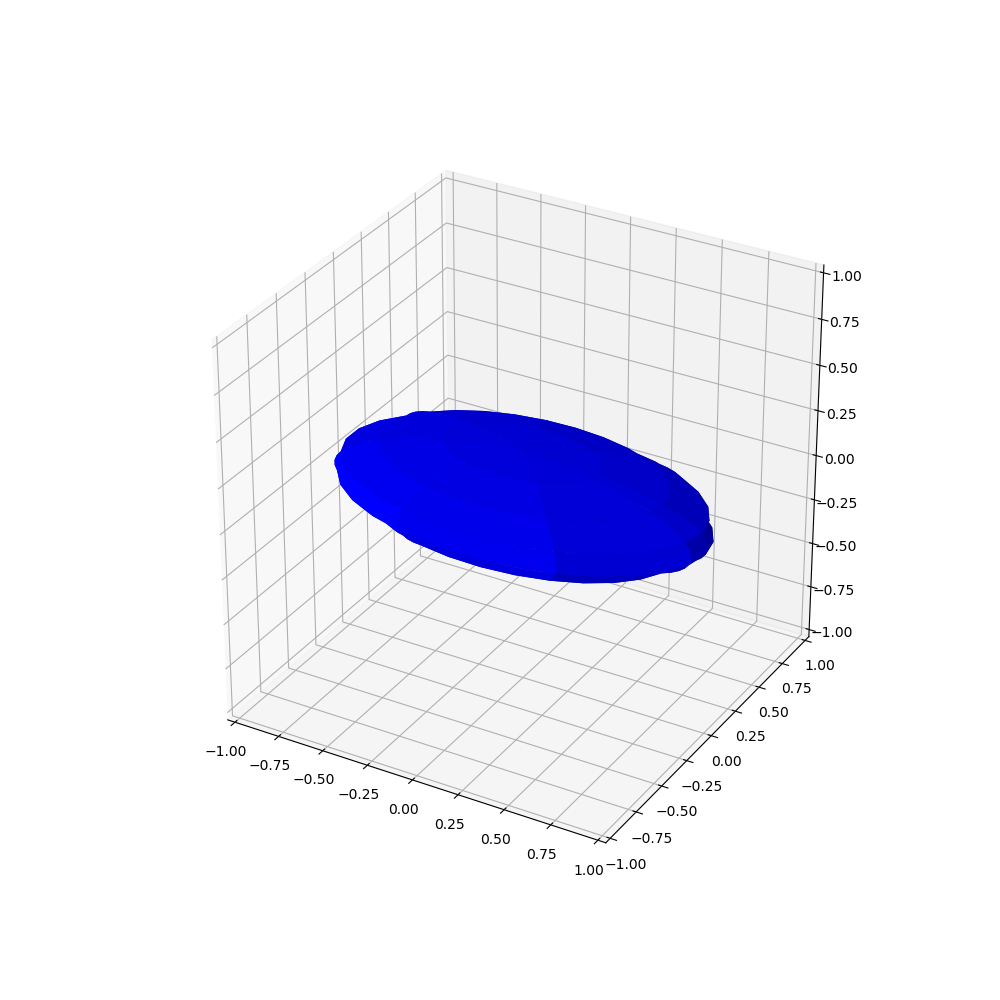

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.rcParams['figure.figsize']=10,10
fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

coefs = (1, 3, 15)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))


xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))
rRotx = np.vstack((xr,yr,zr))

# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')


# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

In [8]:
np.shape(y)

(30, 30)

<IPython.core.display.Javascript object>


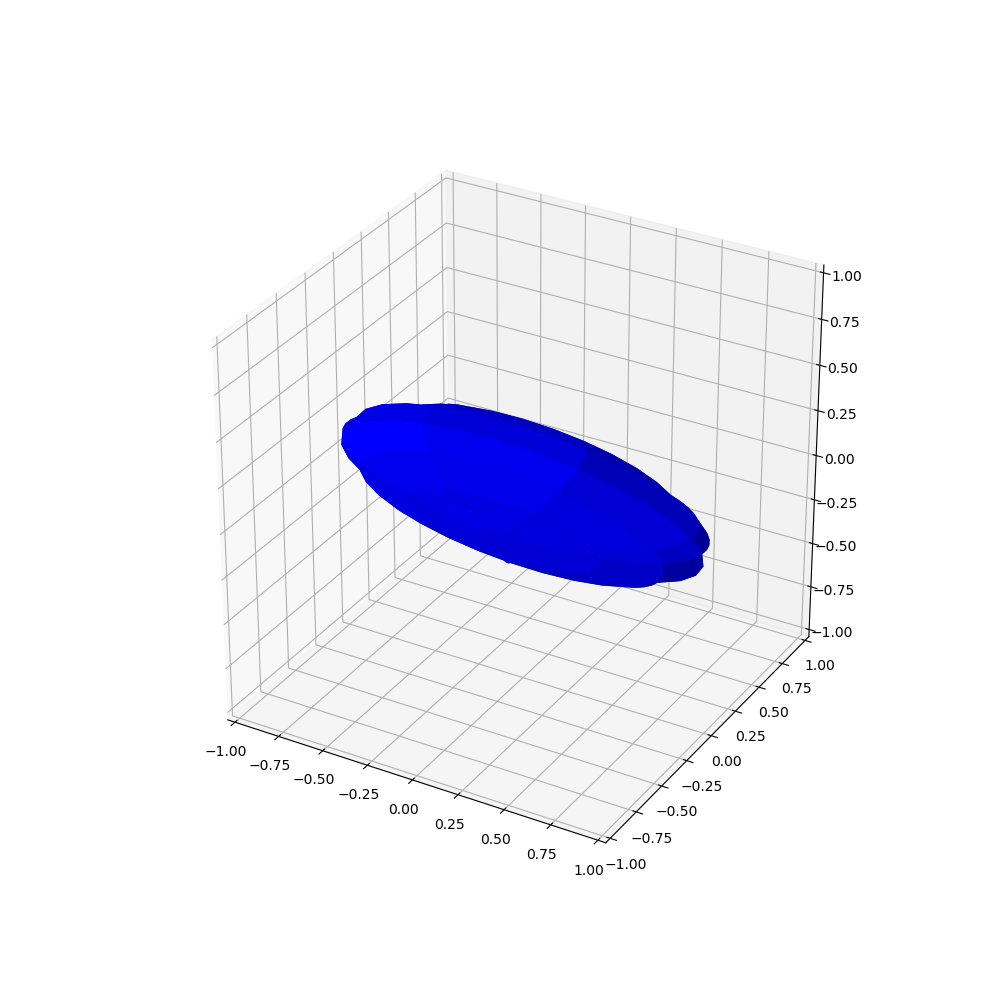

[[ 1.         0.         0.       ]
 [ 0.         0.5        0.8660254]
 [ 0.        -0.8660254  0.5      ]]
(3, 900)


In [9]:

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

Rx = rotationMatrixLocal_xyz(np.pi/3,0,0)
Ry = rotationMatrixLocal_xyz(0,np.pi/3,0)
Rz = rotationMatrixLocal_xyz(0,0,np.pi/3)
RX = rotationMatrixGlobal_xyz(-np.pi/3,0,0)
RY = rotationMatrixGlobal_xyz(0,-np.pi/3,0)
RZ = rotationMatrixGlobal_xyz(0,0,-np.pi/3)
print(Rx)

rRotx = RX@np.vstack((xr,yr,zr))
print(np.shape(rRotx))
# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

<IPython.core.display.Javascript object>


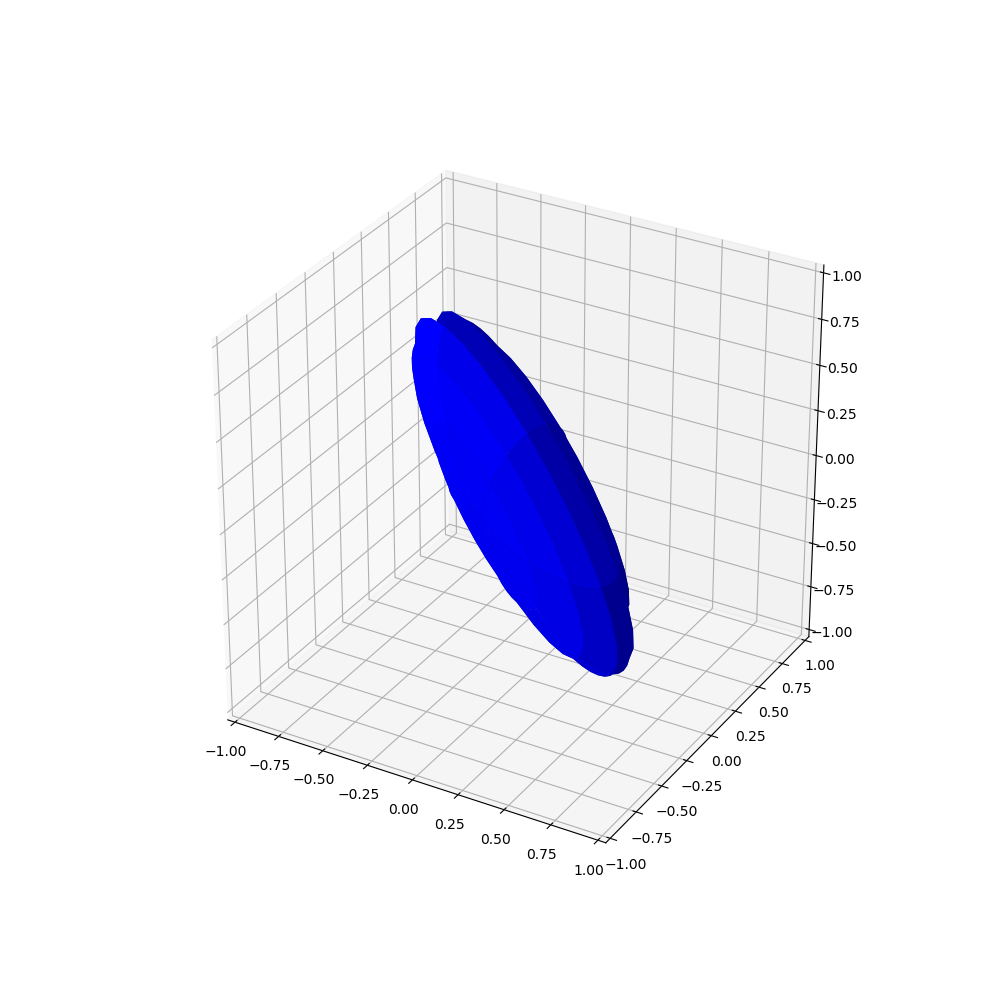

[[ 1.         0.         0.       ]
 [ 0.         0.5        0.8660254]
 [ 0.        -0.8660254  0.5      ]]
(3, 900)


In [10]:

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

Rx = rotationMatrixLocal_xyz(np.pi/3,0,0)
Ry = rotationMatrixLocal_xyz(0,np.pi/4,0)
Rz = rotationMatrixLocal_xyz(0,0,np.pi/3)
RX = rotationMatrixGlobal_xyz(np.pi/3,0,0)
RY = rotationMatrixGlobal_xyz(0,np.pi/3,0)
RZ = rotationMatrixGlobal_xyz(0,0,np.pi/3)
print(Rx)

rRotx = RY@Rx@np.vstack((xr,yr,zr))
#rRotx = RZ@RY@RX@np.vstack((xr,yr,zr))
print(np.shape(rRotx))
# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

<IPython.core.display.Javascript object>


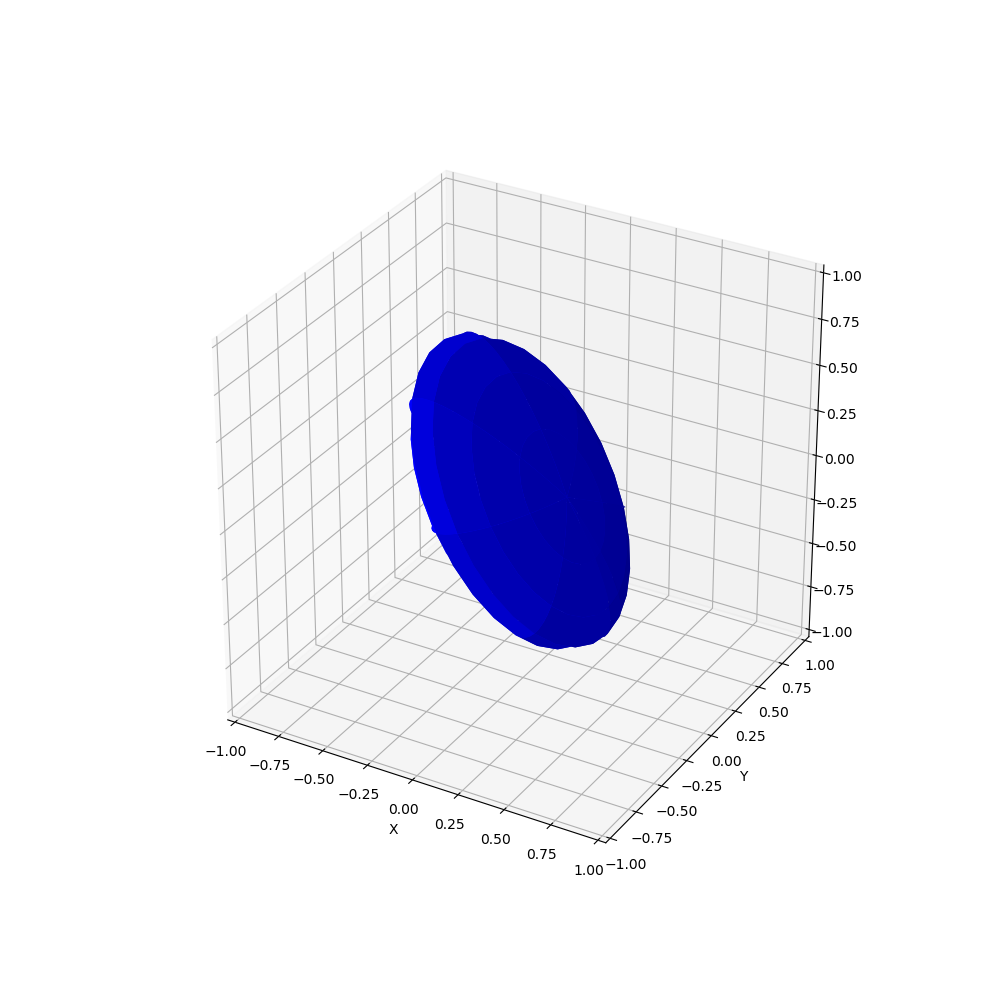

[[ 1.         0.         0.       ]
 [ 0.         0.5        0.8660254]
 [ 0.        -0.8660254  0.5      ]]
(3, 900)


In [11]:

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

Rx = rotationMatrixLocal_xyz(np.pi/3,0,0)
Ry = rotationMatrixLocal_xyz(0,np.pi/4,0)
Rz = rotationMatrixLocal_xyz(0,0,np.pi/3)
RX = rotationMatrixGlobal_xyz(np.pi/3,0,0)
RY = rotationMatrixGlobal_xyz(0,np.pi/3,0)
RZ = rotationMatrixGlobal_xyz(0,0,np.pi/3)
print(Rx)

rRotx = RZ@RY@RX@np.vstack((xr,yr,zr))
#rRotx = RZ@RY@RX@np.vstack((xr,yr,zr))
print(np.shape(rRotx))
# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

plt.xlabel('X')
plt.ylabel('Y')

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

In [12]:
import sympy as sym
sym.init_printing()

In [13]:
a,b,g, a2, b2, g2 = sym.symbols('alpha, beta, gamma, alpha2, beta2, gamma2')

In [14]:
RX = sym.Matrix([[1, 0, 0], [0, sym.cos(a), -sym.sin(a)], [0, sym.sin(a), sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b), 0, sym.sin(b)], [0, 1, 0], [-sym.sin(b), 0, sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g), -sym.sin(g), 0], [sym.sin(g), sym.cos(g), 0], [0, 0, 1]])
RX2 = sym.Matrix([[1, 0, 0], [0, sym.cos(a2), -sym.sin(a2)], [0, sym.sin(a2), sym.cos(a2)]])
RY2 = sym.Matrix([[sym.cos(b2), 0, sym.sin(b2)], [0, 1, 0], [-sym.sin(b2), 0, sym.cos(b2)]])
RZ2 = sym.Matrix([[sym.cos(g2), -sym.sin(g2), 0], [sym.sin(g2), sym.cos(g2), 0], [0, 0, 1]])

In [15]:
Rx, Ry, Rz

(array([[ 1.       ,  0.       ,  0.       ],
        [ 0.       ,  0.5      ,  0.8660254],
        [ 0.       , -0.8660254,  0.5      ]]),
 array([[ 0.70710678,  0.        , -0.70710678],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.70710678,  0.        ,  0.70710678]]),
 array([[ 0.5      ,  0.8660254,  0.       ],
        [-0.8660254,  0.5      ,  0.       ],
        [ 0.       ,  0.       ,  1.       ]]))

In [16]:
Rx = sym.transpose(RX)
Ry = sym.transpose(RY)
Rz = sym.transpose(RZ)

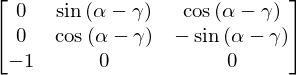

In [21]:
sym.simplify((RZ*RY*RX).subs(b, sym.pi/2))

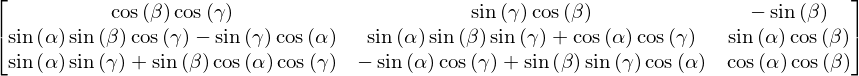

In [18]:
Rx*Ry*Rz

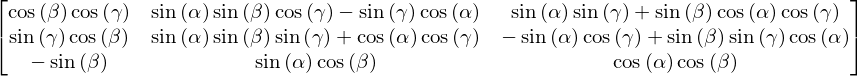

In [19]:
RZ*RY*RX

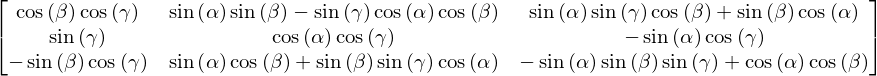

In [20]:
RY*RZ*RX